In [ ]:
'''
DATS 6103 Srilatha Lakka Project -3 (Final Project)
Purpose of Project
1. Learning about Data Mining
2. Learning to extract information from raw data using Python 
3. PV Solar Installation in US
4. Who has installed solar panel and who will be the next?'''

In [46]:
! pip install plotly

In [136]:
from sklearn.metrics import roc_curve, auc
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization


In [92]:
# DATS 6103 Srilatha Lakka Project -3 (Final Project)
# Purpose of Project
#1. Learning about Data Mining
#2. Learning to extract information from raw data using Python 

'''
PV Solar Installation in US '''

#Import required libraries

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import os
import numpy as np
%matplotlib inline
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
from plotly import tools
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import math
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization


In [93]:
py.sign_in('slakka','Pf5T4X7egwQ1QcQZhcJM')

In [94]:
#Extracting PV Solar Installation data by state 
'''
PURPOSE
Project idea Photovoltaic (PV) solar panels, which convert solar energy into electricity, are one of the most attractive
options for the homeowners. Studies have shown that by 2015, there are about 4.8million homeowners had installed solar 
panels in the United states of America. and meanwhile, the solar energy market continues growing rapidly. Indeed, 
the estimated cost and potential saving of solar is the most concerned question. However, there is a tremendous 
commercial potential for the solar energy business, and visualizing the long term tendency of the market is vital 
for the solar energy companies’ survival in the market. The visualization process could be realized by examining 
the following aspects

1. PV installations by state

Reading excel document sheet Solar
'''
data_file = pd.read_excel('Solar_cost_by_state.xlsx', sheetname="Solar")

df1 = (pd.read_excel('Solar_cost_by_state.xlsx', sheetname="Solar" , usecols=(1,2)).fillna(0))

df1.head()



,Abbr,Cost
0,AK,19031
1,AL,22390
2,AR,18595
3,AZ,14588
4,CA,10192


In [95]:
'''
   Map Solar PV installation cost by state
'''

'''
Think solar is out of reach? In many states, you can go solar for less than $10,000. Here's a look
at the average cost to go solar in each state.
'''

scale = [[0.0, 'rgb(223,221,228)'], [0.2, 'rgb(199,199,201)'],
         [0.4, 'rgb(169,170,201)'], [0.6, 'rgb(139,135,181)'],
         [0.8, 'rgb(98,88,158)'], [1.0, 'rgb(63,20,122)']]

def mapper():
    data = [dict(type='choropleth',
                 colorscale=scale,
                 locations=df1['Abbr'],
                 z=df1['Cost'],
                 locationmode='USA-states',
                 text=df1['Abbr'],
                 hoverinfo='location+z',
                 marker=dict(line=dict(color='rgb(63,20,122)', width=2)),
                 colorbar=dict(title='"Solar Cost by State" '))]
    
    layout = dict(title='"Solar Installation Cost by State" ' + '<br> Hover for value',
                  geo=dict(scope='USA',
                           projection=dict(type='albers usa'), showlakes=False, 
                                                               lakecolor='rgb(95,145,237)'))
    
    fig = dict(data=data, layout=layout)
    return py.iplot(fig, validate=False, filename='Solar_cost_by_state.xlsx')

In [96]:
mapper()


In [97]:
df3 = ((pd.read_excel('Solar_cost_by_state.xlsx', sheetname="Solar", usecols=(1,5))).fillna(0))

df3.head()

,Abbr,Tax Credit
0,AK,1000
1,AL,0
2,AR,1000
3,AZ,0
4,CA,0


In [98]:
'''
   Map showing how long it'll take to pay for itself
'''

'''
High cost equals long payback time.A state with good incentives can mean a low net cost, but if 
electricity is cheap in that state(like Arizona or Lousiana), the payback period can still be pretty long.
Conversely, a system may cost more in a given state, but if electricity prices there are high, the payback
period may actually be pretty short.
'''

scale = [[0.0, 'rgb(237,219,203)'], [0.2, 'rgb(219,177,138)'],
         [0.4, 'rgb(239,191,146)'], [0.6, 'rgb(244,187,134)'],
         [0.8, 'rgb(244,167,95)'], [1.0, 'rgb(249,162,79)']]

def mapper():
    data = [dict(type='choropleth',
                 colorscale=scale,
                 locations=df3['Abbr'],
                 z=df3['Tax Credit'],
                 locationmode='USA-states',
                 text=df3['Abbr'],
                 hoverinfo='location+z',
                 marker=dict(line=dict(color='rgb(237,118,7)', width=2)),
                 colorbar=dict(title='"Solar Tax Credit by State" '))]
    
    layout = dict(title='"Solar Tax Credit by State" ' + '<br> Hover for value',
                  geo=dict(scope='USA',
                           projection=dict(type='albers usa'), showlakes=False, 
                                                               lakecolor='rgb(95,145,237)'))
    
    fig = dict(data=data, layout=layout)
    return py.iplot(fig, validate=False, filename='Solar_cost_by_state.xlsx')

In [99]:
mapper()


In [100]:
df4 = ((pd.read_excel('Solar_cost_by_state.xlsx', sheetname="Solar", usecols=(1,6))).fillna(0))

df4.head()

,Abbr,Savings every month
0,AK,59
1,AL,59
2,AR,59
3,AZ,137
4,CA,143


In [101]:
'''
   Map showing what you could save every month 
'''

'''
By going solar, people around the country are saving momey each month that would have gone to utility
companies. Just how much are they saving? In some places, over $100 each month.
'''

scale = [[0.0, 'rgb(229, 239, 222)'], [0.2, 'rgb(200, 232, 178)'],
         [0.4, 'rgb(178, 234, 140)'], [0.6, 'rgb(168, 234, 124)'],
         [0.8, 'rgb(150, 244, 88)'], [1.0, 'rgb(72, 137, 28)']]

def mapper():
    data = [dict(type='choropleth',
                 colorscale=scale,
                 locations=df4['Abbr'],
                 z=df4['Savings every month'],
                 locationmode='USA-states',
                 text=df4['Abbr'],                 hoverinfo='location+z',
                 marker=dict(line=dict(color='rgb(34, 66, 13)', width=2)),
                 colorbar=dict(title='"Monthly $ savings by state" '))]
    
    layout = dict(title='"Savings Every Month by State" ' + '<br> Hover for value',
                  geo=dict(scope='USA',
                           projection=dict(type='albers usa'), showlakes=False, 
                                                               lakecolor='rgb(95,145,237)'))
    
    fig = dict(data=data, layout=layout)
    return py.iplot(fig, validate=False, filename='Solar_cost_by_state.xlsx')

In [102]:
mapper()

In [103]:
df5 = ((pd.read_excel('Solar_cost_by_state.xlsx', sheetname="Solar", usecols=(1,7))).fillna(0))

df5.head()

,Abbr,Savings over 20 years
0,AK,15521
1,AL,18076
2,AR,14076
3,AZ,32979
4,CA,34260


In [104]:
'''
   Map showing what you could save every month 
'''

'''
By going solar, people around the country are saving momey each month that would have gone to utility
companies. Just how much are they saving? In some places, over $100 each month.
'''

scale = [[0.0, 'rgb(242, 220, 244)'], [0.2, 'rgb(241, 200, 244)'],
         [0.4, 'rgb(226, 169, 232)'], [0.6, 'rgb(215, 141, 221)'],
         [0.8, 'rgb(231, 109, 242)'], [1.0, 'rgb(100, 26, 107)']]

def mapper():
    data = [dict(type='choropleth',
                 colorscale=scale,
                 locations=df5['Abbr'],
                 z=df5['Savings over 20 years'],
                 locationmode='USA-states',
                 text=df5['Abbr'],
                 hoverinfo='location+z',
                 marker=dict(line=dict(color='rgb(34, 66, 13)', width=2)),
                 colorbar=dict(title='" $ Savings over 20 years by state" '))]
    
    layout = dict(title='"Savings Over 20 Years by State" ' + '<br> Hover for value',
                  geo=dict(scope='USA',
                           projection=dict(type='albers usa'), showlakes=False, 
                                                               lakecolor='rgb(95,145,237)'))
    
    fig = dict(data=data, layout=layout)
    return py.iplot(fig, validate=False, filename='Solar_cost_by_state.xlsx')

In [105]:
mapper()

In [106]:
df6 = ((pd.read_excel('Solar_cost_by_state.xlsx', sheetname="Solar", usecols=(1,8))).fillna(0))

df6.head()

,Abbr,Time taken to pay off in years
0,AK,17.0
1,AL,19.0
2,AR,0.0
3,AZ,10.0
4,CA,9.0


In [107]:
'''
   Map showing How long it'll take to pay for itself
'''
scale = [[0.0, 'rgb(138, 191, 234)'], [0.2, 'rgb(106, 160, 204)'],
         [0.4, 'rgb(87, 162, 224)'], [0.6, 'rgb(54, 154, 237)'],
         [0.8, 'rgb(26, 106, 173)'], [1.0, 'rgb(19, 71, 114)']]

def mapper():
    data = [dict(type='choropleth',
                 colorscale=scale,
                 locations=df6['Abbr'],
                 z=df6['Time taken to pay off in years'],
                 locationmode='USA-states',
                 text=df5['Abbr'],
                 hoverinfo='location+z',
                 marker=dict(line=dict(color='rgb(34, 66, 13)', width=2)),
                 colorbar=dict(title='" Time taken to pay off in years by state" '))]
    
    layout = dict(title='"Time Taken to Pay Off in Years by State" ' + '<br> Hover for value',
                  geo=dict(scope='USA',
                           projection=dict(type='albers usa'), showlakes=False, 
                                                               lakecolor='rgb(19, 71, 114)'))
    
    fig = dict(data=data, layout=layout)
    return py.iplot(fig, validate=False, filename='Solar_cost_by_state.xlsx')

In [108]:
mapper()

In [109]:
df7 = (pd.read_excel('Solar_cost_by_state.xlsx', sheetname="Sheet8"))

df7.head()

,Sectors,Electricity Price
0,Residential,12.89¢
1,Commercial,10.44¢
2,Industrial,6.58¢
3,Transportation,9.53¢


In [110]:
import plotly.figure_factory as ff#visualization
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization

In [111]:
df7.dtypes

Sectors              object
Electricity Price    object
dtype: object

In [112]:
df7['Electricity Price']=pd.to_numeric(df7['Electricity Price'], errors="coerce").fillna(0).astype(int)

In [113]:
df7.dtypes

Sectors              object
Electricity Price     int32
dtype: object

In [114]:
dfnew = pd.read_excel("Solar_average.xlsx")

In [115]:
dfnew.head(5)

,Year,State,Industry Sector Category,Residential,Commercial,Industrial,Transportation,Other,Total
0,2017,AK,Total Electric Industry,21.27,18.89,16.34,0.00,NaN,19.10
1,2017,AL,Total Electric Industry,12.55,11.60,6.16,0.00,NaN,9.83
2,2017,AR,Total Electric Industry,10.28,8.51,6.07,12.26,NaN,8.26
3,2017,AZ,Total Electric Industry,12.44,10.50,6.45,9.65,NaN,10.64
4,2017,CA,Total Electric Industry,18.31,15.76,12.73,8.68,NaN,16.06


In [116]:
dfnew.dtypes

Year                          int64
State                        object
Industry Sector Category     object
Residential                 float64
Commercial                  float64
Industrial                  float64
Transportation              float64
Other                       float64
Total                       float64
dtype: object

In [117]:
dff = dfnew.groupby('State').Residential.mean().to_frame().sort_values(by='Residential',
                                                    ascending=False)[:12].round(2)

trace = go.Scatter(
    x=dff.index,
    y=dff.Residential,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 30,
        color = dff.Residential.values,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(xaxis=dict(tickangle=-20),
    title='Top 12 States by Residential Cost ', 
                   yaxis = dict(title = 'cost')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [118]:
df_w = pd.read_excel("weather.xlsx")

In [119]:
df_w.head(2)

,State,Place,SunPercent,Total Hours,Clear Days
0,Alabama,Birmingham,58,2641,99
1,Alaska,Anchorage,41,2061,61


In [120]:
df_w.dtypes

State          object
Place          object
SunPercent     object
Total Hours    object
Clear Days      int64
dtype: object

In [121]:
df_w['SunPercent']=pd.to_numeric(df_w.SunPercent, errors="coerce").fillna(0).astype(int)

In [122]:
state_codes = {
    'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 
    'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 
    'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 
    'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 
    'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 
    'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 
    'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 
    'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI',
    'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 
    'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 
    'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 
    'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 
    'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 
    'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 
    'Nevada': 'NV', 'Maine': 'ME'}

df_w['State'] = df_w['State'].apply(lambda x : state_codes[x])

In [123]:
dff = df_w.groupby('State').SunPercent.sum().to_frame().sort_values(by='SunPercent',
                                                    ascending=False)[:12].round(2)
trace1 = go.Bar(
    x=dff.index,
    y=dff.SunPercent,
    name='Sun Percentage',
    marker=dict(
        color = 'teal'
    )
)

data = [trace1]
layout = go.Layout(
    title='', 
    yaxis = dict(title = '%SunLight')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)



In [124]:
df_comb = pd.merge(dfnew, df_w, on='State')

In [125]:
df_comb.head()

,Year,State,Industry Sector Category,Residential,Commercial,Industrial,Transportation,Other,Total,Place,SunPercent,Total Hours,Clear Days
0,2017,AK,Total Electric Industry,21.27,18.89,16.34,0.0,NaN,19.10,Anchorage,41,2061,61
1,2017,AK,Full-Service Providers,21.27,18.89,16.34,0.0,NaN,19.10,Anchorage,41,2061,61
2,2016,AK,Total Electric Industry,20.30,17.56,15.22,0.0,NaN,17.93,Anchorage,41,2061,61
3,2016,AK,Full-Service Providers,20.30,17.56,15.22,0.0,NaN,17.93,Anchorage,41,2061,61
4,2015,AK,Total Electric Industry,19.83,17.44,14.53,0.0,NaN,17.59,Anchorage,41,2061,61


In [126]:
dff = df_comb.groupby('State').Residential.mean().to_frame().sort_values(by='Residential',
                                                    ascending=False)[:12].round(2)
trace1 = go.Bar(
    x=dff.index,
    y=dff.Residential,
    name='Residential Cost',
    marker=dict(
        color = 'navy'
    )
)

dff = df_comb.groupby('State').SunPercent.mean().to_frame().sort_values(by='SunPercent',
                                                    ascending=False)[:12].round(2)
trace2 = go.Bar(
    x=dff.index,
    y=dff.SunPercent,
    name='Sun Percentage',
    marker=dict(
        color = 'red'
    )
)


data = [trace1,trace2]
layout = go.Layout(
    title='', 
    yaxis = dict(title = '%')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)



In [127]:
df2 = ((pd.read_excel('Solar_cost_by_state.xlsx', sheetname="Solar", usecols=(0,3))).fillna(0)).set_index('State')

df2 = df2.dropna()

#Extracting Top 10 states that have high incentives 

df10INC = df2.nlargest(10, ['Incentive'])


df10INC.head()

,Incentive
State,
Hawaii,9.45
California,4.07
New Mexico,3.50
New Jersey,3.25
Connecticut,3.22


In [128]:
#top 10 states with highest Rank of installations
dfrank = ((pd.read_excel('Solar_cost_by_state.xlsx', sheetname="Rank1", usecols=(1,2))).fillna(0)).set_index('State')

df10Rank = dfrank.nlargest(10, ['Installation_count'])

df10Rank.head()


,Installation_count
State,
California,626824
Arizona,89363
Massachusetts,71421
New Jersey,51048
New York,51030


In [129]:
#top 10 states with highest electricity rate 
dfelec = ((pd.read_excel('Solar_cost_by_state.xlsx', sheetname="Electricity", usecols=(0,1))).fillna(0)).set_index('State')

df10Elec = dfelec.nlargest(10, ['Cost/watt'])

df10Elec.head()

,Cost/watt
State,
Hawaii,31.52
Massachusetts,22.19
Rhode Island,21.66
Connecticut,21.58
Alaska,21.10


In [130]:
dftax = ((pd.read_excel('Solar_cost_by_state.xlsx', sheetname="Solar", usecols=(0,5))).fillna(0)).set_index('State')

dftax = dftax.dropna()

dftax10 = dftax.nlargest(10, ['Tax Credit'])

dftax10.head()

,Tax Credit
State,
Hawaii,5000
Iowa,5000
Indiana,5000
New York,5000
South Carolina,5000


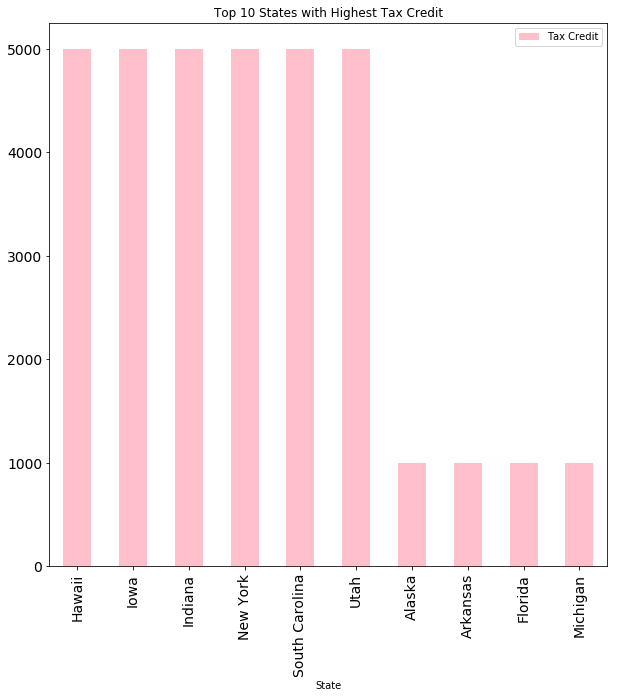

In [131]:
# Creating a bar diagram showing top 10 states with highest tax credit

axtax = dftax10.plot( kind='bar', width= .5, figsize = (10,10),  fontsize = 14, 
                     title = 'Top 10 States with Highest Tax Credit', color=[ 'pink'])
plt.show()




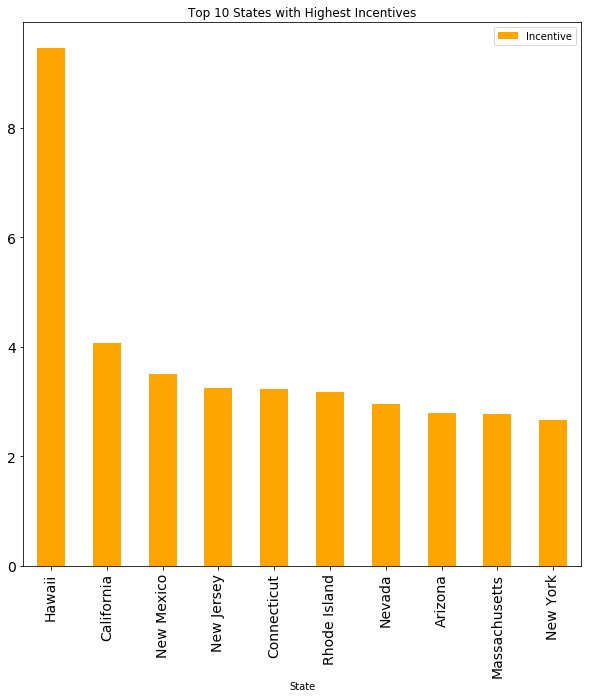

In [132]:
# Creating a bar diagram showing top 10 states with highest incentives

ax1nc = df10INC.plot( kind='bar', width= .5, figsize = (10,10),  fontsize = 14, 
                 title = 'Top 10 States with Highest Incentives', color=[ 'orange'])
plt.show()



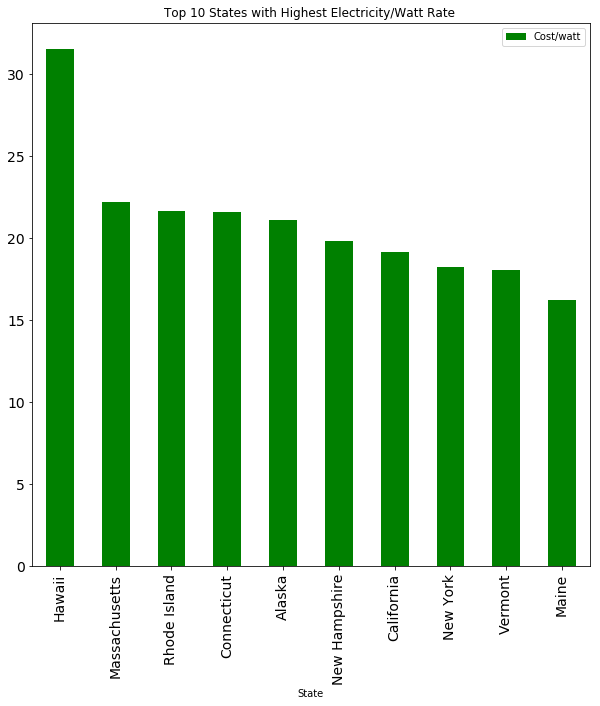

In [133]:

# Creating a bar diagram showing top 10 states with highest Electricity rate
ax3 = df10Elec.plot( kind='bar', width= .5, figsize = (10,10),  fontsize = 14, 
                 title = 'Top 10 States with Highest Electricity/Watt Rate ', color=[ 'green'] )

plt.show()

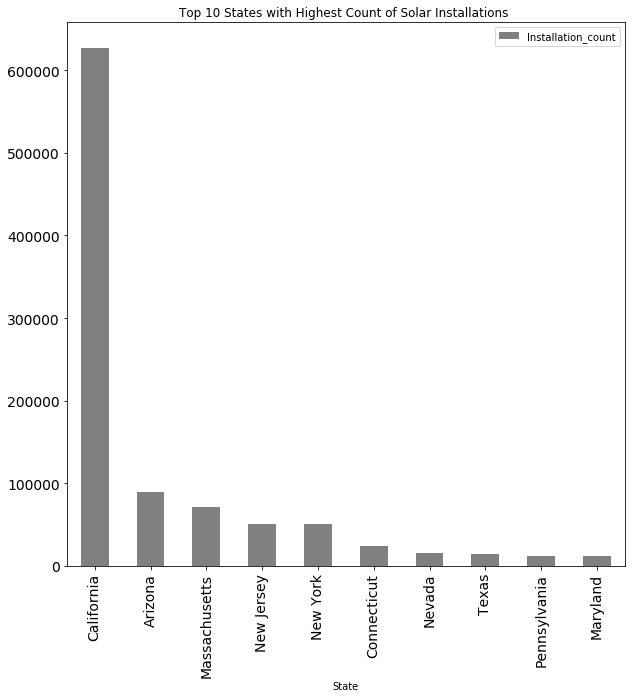

In [134]:

# Creating a bar diagram showing top 10 states with highest Rank of installations

ax2 = df10Rank.plot( kind='bar', width= .5, figsize = (10,10),  fontsize = 14, 
                 title = 'Top 10 States with Highest Count of Solar Installations ', color=[ 'grey'])
plt.show()
